In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_auctions = pd.read_csv('procurement_auction_data/Licitações.csv', encoding='cp1252', sep=';')
df_itens = pd.read_csv('procurement_auction_data/Itens.csv', encoding='cp1252', sep=';')
df_empenhos = pd.read_csv('procurement_auction_data/Empenhos.csv', encoding='cp1252', sep=';')
df_participants = pd.read_csv('procurement_auction_data/Participantes.csv', encoding='cp1252', sep=';')

/var/folders/ph/58c8ymvn44b20qwv_6w1170w0000gn/T/ipykernel_88258/3465813831.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_participants = pd.read_csv('procurement_auction_data/Participantes.csv', encoding='cp1252', sep=';')


In [10]:
# Create a LaTeX table with summary statistics
def create_latex_summary_table():
    # Create a list of dataframes and their names
    dfs = [
        ('Empenhos', df_empenhos),
        ('Items', df_itens),
        ('Licitações', df_auctions),
        ('Participantes', df_participants)
    ]
    
    # Start LaTeX table
    latex_table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{lcc}\n\\hline\n"
    latex_table += "Dataset & Records & Columns \\\\\n\\hline\n"
    
    # Add rows for each dataframe
    for name, df in dfs:
        latex_table += f"{name} & {len(df):,} & {len(df.columns)} \\\\\n"
    
    # End table
    latex_table += "\\hline\n\\end{tabular}\n"
    latex_table += "\\caption{Summary Statistics of Datasets}\n"
    latex_table += "\\label{tab:dataset_summary}\n\\end{table}"
    
    return latex_table

# Create and print the LaTeX table
print(create_latex_summary_table())

# Create detailed information tables for each dataframe
def create_detailed_info_tables():
    latex_tables = []
    
    for name, df in [
        ('Empenhos', df_empenhos),
        ('Items', df_itens),
        ('Licitações', df_auctions),
        ('Participantes', df_participants)
    ]:
        # Get column information
        info = pd.DataFrame({
            'Column': df.columns,
            'Non-Null Count': df.count(),
            'Dtype': df.dtypes
        })
        
        # Calculate percentage of non-null values with 2 decimal places
        info['Non-Null %'] = (info['Non-Null Count'] / len(df) * 100).round(2)
        
        # Create LaTeX table
        latex_table = f"\\begin{{table}}[h]\n\\centering\n\\begin{{tabular}}{{p{{3.5cm}}cc}}\n\\hline\n"
        latex_table += "Column & Non-Null Count & Data Type \\\\\n\\hline\n"
        
        for _, row in info.iterrows():
            latex_table += f"{row['Column']} & {row['Non-Null Count']:,} ({row['Non-Null %']:.2f}%) & {row['Dtype']} \\\\\n"
        
        latex_table += "\\hline\n\\end{tabular}\n"
        latex_table += f"\\caption{{Detailed Information for {name} Dataset}}\n"
        latex_table += f"\\label{{tab:{name.lower()}_info}}\n\\end{{table}}\n"
        
        latex_tables.append(latex_table)
    
    return latex_tables

# Print detailed information tables
for table in create_detailed_info_tables():
    print("\n" + table)


\begin{table}[h]
\centering
\begin{tabular}{lcc}
\hline
Dataset & Records & Columns \\
\hline
Empenhos & 740,581 & 10 \\
Items & 1,365,244 & 14 \\
Licitações & 170,096 & 17 \\
Participantes & 9,304,097 & 13 \\
\hline
\end{tabular}
\caption{Summary Statistics of Datasets}
\label{tab:dataset_summary}
\end{table}

\begin{table}[h]
\centering
\begin{tabular}{p{3.5cm}cc}
\hline
Column & Non-Null Count & Data Type \\
\hline
Número Licitação & 740,581 (100.00%) & int64 \\
Código UG & 740,581 (100.00%) & int64 \\
Nome UG & 740,581 (100.00%) & object \\
Código Modalidade Compra & 740,581 (100.00%) & int64 \\
Modalidade Compra & 740,581 (100.00%) & object \\
Número Processo & 740,575 (100.00%) & object \\
Código Empenho & 740,581 (100.00%) & object \\
Data Emissão Empenho & 652,547 (88.11%) & object \\
Observação Empenho & 740,581 (100.00%) & object \\
Valor Empenho (R$) & 740,581 (100.00%) & object \\
\hline
\end{tabular}
\caption{Detailed Information for Empenhos Dataset}
\label{tab:empenhos_i

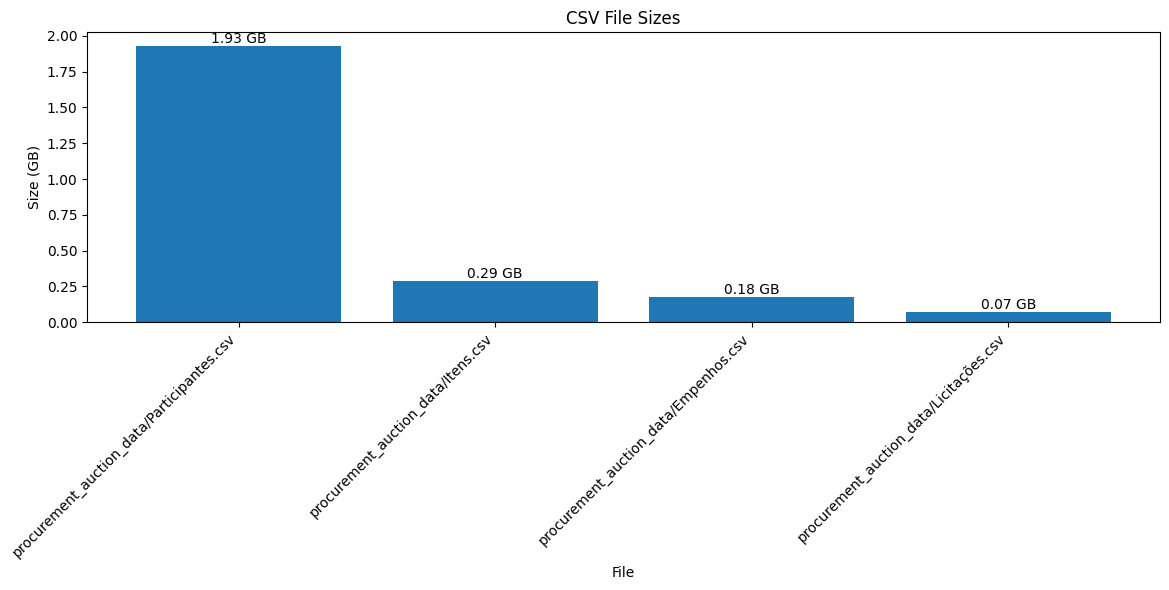


Detailed Memory Usage:
                                      File  Size (GB)
procurement_auction_data/Participantes.csv   1.928353
        procurement_auction_data/Itens.csv   0.289870
     procurement_auction_data/Empenhos.csv   0.176034
   procurement_auction_data/Licitações.csv   0.072333


In [6]:
import os

# Function to get memory usage of each CSV file
def get_csv_memory_usage():
    # Dictionary to store file sizes
    file_sizes = {}
    
    # List of CSV files
    csv_files = [
        'procurement_auction_data/Empenhos.csv',
        'procurement_auction_data/Itens.csv',
        'procurement_auction_data/Licitações.csv',
        'procurement_auction_data/Participantes.csv'
    ]
    
    # Get file sizes
    for file in csv_files:
        try:
            # Get file size in bytes
            size_bytes = os.path.getsize(file)
            
            # Convert to GB for better readability
            size_gb = size_bytes / (1024 * 1024 * 1024)
            
            file_sizes[file] = size_gb
        except FileNotFoundError:
            print(f"Warning: {file} not found")
    
    # Create DataFrame for better visualization
    df_sizes = pd.DataFrame({
        'File': list(file_sizes.keys()),
        'Size (GB)': list(file_sizes.values())
    })
    
    # Sort by size
    df_sizes = df_sizes.sort_values('Size (GB)', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df_sizes['File'], df_sizes['Size (GB)'])
    plt.title('CSV File Sizes')
    plt.xlabel('File')
    plt.ylabel('Size (GB)')
    plt.xticks(rotation=45, ha='right')
    
    # Add size labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f} GB',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return df_sizes

# Get and display memory usage
memory_usage = get_csv_memory_usage()
print("\nDetailed Memory Usage:")
print(memory_usage.to_string(index=False))
